In [1]:
# Importing libraries

import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import os
from datetime import datetime

In [ ]:
# Reading the data

In [2]:
df = pd.read_csv("./datasets/traffic.csv")

In [7]:
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB


In [9]:
df.describe()

,event,date,country,city,artist,album,track,isrc,linkid
count,226278,226278,226267,226267,226241,226273,226273,219157,226278
unique,3,7,211,11993,2419,3254,3562,709,3839
top,pageview,2021-08-19,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
freq,142015,35361,47334,22791,40841,40841,40841,40841,40841


In [11]:
df['event'].unique()

array(['click', 'preview', 'pageview'], dtype=object)

In [12]:
df['date'] = pd.to_datetime(df['date'])

 Question 1 How many total pageview events did the links in the provided dataset receive in the full period, how many per day?

In [13]:
df[df['event'] == 'pageview'].groupby(['date'])['event'].count()

date
2021-08-19    22366
2021-08-20    21382
2021-08-21    21349
2021-08-22    20430
2021-08-23    18646
2021-08-24    18693
2021-08-25    19149
Name: event, dtype: int64

Question 2
[Pandas] What about the other recorded events?

In [15]:
# get the set of recorded events in the data
recorded_events = set(df["event"].unique())
# remove the 'pageview' event
recorded_events.remove("pageview")
recorded_events

{'click', 'preview'}

In [16]:
# loop over each event
for recorded_event in recorded_events:
    # get the total number of occurrences
    total_events = df[df["event"] == recorded_event].shape[0]
    print("Total number of", recorded_event, "events is", total_events, "\n")
    # group by the date and aggregate by count
    data_set = df[df["event"] == recorded_event].groupby(by="date")["event"].count()
    print(recorded_event, "event distribution per day:\n")
    print(data_set, "\n")

Total number of click events is 55732 

click event distribution per day:

date
2021-08-19    9207
2021-08-20    8508
2021-08-21    8071
2021-08-22    7854
2021-08-23    7315
2021-08-24    7301
2021-08-25    7476
Name: event, dtype: int64 

Total number of preview events is 28531 

preview event distribution per day:

date
2021-08-19    3788
2021-08-20    4222
2021-08-21    4663
2021-08-22    4349
2021-08-23    3847
2021-08-24    3840
2021-08-25    3822
Name: event, dtype: int64 



Question 3
[Pandas] Which countries did the clicks come from?

In [18]:
df[df['event'] == 'click']['country'].unique()

array(['Saudi Arabia', 'India', 'France', 'Maldives', 'United States',
       'Sierra Leone', 'United Kingdom', 'Sweden', 'United Arab Emirates',
       'Qatar', 'Germany', 'Albania', 'Iraq', 'Romania', 'Morocco',
       'Kuwait', 'Nigeria', 'Finland', 'Bangladesh', 'Fiji', 'Turkey',
       'Russia', 'Belgium', 'Norway', 'Cabo Verde', 'Italy', 'Austria',
       'Libya', 'Pakistan', 'Bahrain', 'Tunisia', 'DR Congo', 'Australia',
       'Canada', 'Kenya', 'French Guiana', 'Jordan', 'Netherlands',
       'Somalia', 'Mexico', 'Oman', 'Sri Lanka', 'Ecuador', 'Latvia',
       'Guatemala', 'South Africa', 'Bosnia and Herzegovina', 'Yemen',
       'Switzerland', 'Slovenia', 'Mauritania', 'Cameroon', 'Spain',
       'Thailand', 'Egypt', 'Poland', 'Ghana', 'Gabon', 'Greece',
       'Burkina Faso', 'Malaysia', 'Zambia', 'American Samoa', 'Algeria',
       'Uganda', 'Bulgaria', 'Denmark', 'Colombia', 'Portugal', 'Senegal',
       'Ireland', 'Panama', 'Serbia', 'Haiti', 'Honduras', 'Tanzania',
    

Question 4
[Pandas] What was the overall click rate (clicks/pageviews)?

The click rate is the number of clicks that a page has received (event = 'click') divided by the number of times it has been shown (event = 'pageview'). It is a commonly used metric that measures the success of an advertising campaign.



In [24]:
clicks = df[df['event'] == 'click'].groupby(['linkid'])['event'].count().to_frame()
clicks = clicks.rename(columns={
    "event": "clicks" # rename column for easier manipulation
})
pageviews = df[df["event"] == "pageview"].groupby(by="linkid")["event"].count().to_frame()

pageviews = pageviews.rename(columns={
    "event": "pageviews"
})


In [28]:
df_q4 = clicks.join(pageviews)
# define a new column of the 'click_rate'
df_q4["click_rate"] = df_q4["clicks"] / df_q4["pageviews"]
print(df_q4)

                                      clicks  pageviews  click_rate
linkid                                                             
00126b32-0c35-507b-981c-02c80d2aa8e7       2        2.0    1.000000
004b9724-abca-5481-b6e9-6148a7ca00a5       1        1.0    1.000000
0063a982-41cd-5629-96d0-e1c4dd72ea11       2        3.0    0.666667
006af6a0-1f0d-4b0c-93bf-756af9071c06       8       36.0    0.222222
00759b81-3f04-4a61-b934-f8fb3185f4a0       3        4.0    0.750000
...                                      ...        ...         ...
ffd8d5a7-91bc-48e1-a692-c26fca8a8ead      29       84.0    0.345238
fff38ca0-8043-50cd-a5f1-f65ebb7105c5       1        1.0    1.000000
fff84c0e-90a1-59d8-9997-adc909d50e16       1        1.0    1.000000
fffc17a7-f935-5d3e-bd3e-d761fd80d479       1        2.0    0.500000
fffd0045-29de-522b-b5d8-35786363bf07       1        2.0    0.500000

[2255 rows x 3 columns]


Question 5
[Pandas] How does the clickrate distribute across different links?

<Axes: >

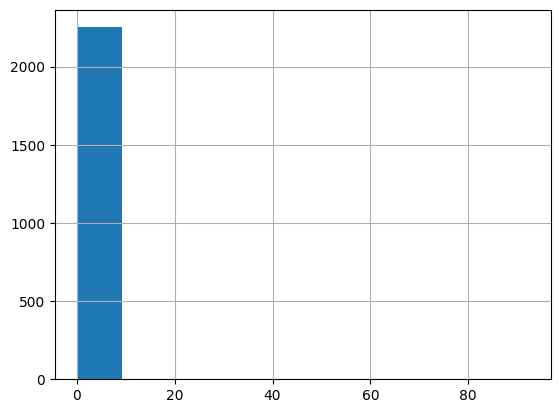

In [30]:
df_q4["click_rate"].hist()

<Axes: >

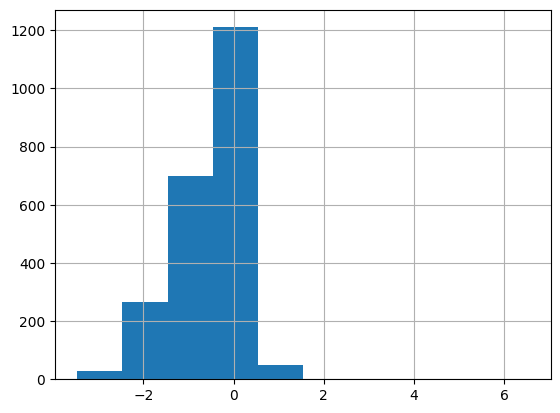

In [31]:
# because the data is highly skewed, it makes more sense to plot the log of it
df_q4["click_rate_log2"] = np.log2(df_q4["click_rate"])
df_q4["click_rate_log2"].hist()

Question 6
[Pandas & SciPy] Is there any correlation between clicks and previews on a link? Is it significant? How large is the effect? Make sure to at least test for potential linear as well as categorical (think binary) relationships between both variables.

In [47]:
# filter only events that are relevant to the question
df_q6 = df[df["event"].isin(["click", "preview"])]

In [48]:
# filter only 'click' events and group them by the 'linkid' to get their count,
# i.e., number of clicks on each link
link_clicks = df[df["event"] == "click"].groupby(by="linkid")["event"].count().reset_index()
link_clicks = link_clicks.rename(columns={
    "event": "clicks" # rename column for easier manipulation
})
# do the same for the 'preview' events
previews = df[df["event"] == "preview"].groupby(by="linkid")["event"].count().reset_index()
previews = previews.rename(columns={
    "event": "previews"
})

In [49]:
# perform two database-style joins to append the 
# number of link clicks and previews to each row
df_q6 = pd.merge(left=df_q6, right=link_clicks, how="left", on="linkid")
df_q6 = pd.merge(left=df_q6, right=previews, how="left", on="linkid")


In [55]:
df_q6.dropna(subset=["clicks", "previews"], inplace=True)
df_q6

,event,date,country,city,artist,album,track,isrc,linkid,clicks,previews
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2,1187.0,718.0
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd,69.0,30.0
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
...,...,...,...,...,...,...,...,...,...,...,...
84258,preview,2021-08-23,United States,Brentwood,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
84259,preview,2021-08-23,Saudi Arabia,Riyadh,Evanescence,Fallen,Bring Me To Life,USWU30200093,0ea9f8bf-a144-42bd-a7b0-124e73914da4,20.0,14.0
84260,preview,2021-08-23,Ukraine,Kyiv,Miscél,when you left,when you left,QM42K1907890,2fc15e8b-83aa-40ee-9f9d-5d96c6d4356c,235.0,145.0
84261,preview,2021-08-23,Saudi Arabia,Khamis Mushait,Anne-Marie,Beautiful,Beautiful,GBAHS2100225,522da5cc-8177-4140-97a7-a84fdb4caf1c,2109.0,1605.0


In [59]:
df_q6.loc[:,['clicks','previews']].corr()

,clicks,previews
clicks,1.000000,0.998713
previews,0.998713,1.000000
